# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importação da base de dados

In [2]:
df = pd.read_csv("SP_poluicao_dados.csv")

# Avaliação primária dos dados

In [3]:
df.shape

(10980515, 10)

In [4]:
df.head()

,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980515 entries, 0 to 10980514
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   ID          int64  
 2   Data        object 
 3   Hora        object 
 4   Estacao     object 
 5   Codigo      object 
 6   Poluente    object 
 7   Valor       float64
 8   Unidade     object 
 9   Tipo        object 
dtypes: float64(1), int64(2), object(7)
memory usage: 837.7+ MB


In [6]:
df.describe(include='all')

,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
count,1.098052e+07,1.098052e+07,10980515,10980515,10980515,10980515,10980515,1.098052e+07,10980515,10980515
unique,NaN,NaN,2557,24,87,87,9,NaN,1,2
top,NaN,NaN,2017-04-19,17:00,Santos - Ponta da Praia,SP64,MP10,NaN,ug/m3,automatica
freq,NaN,NaN,5674,469259,287897,287897,2883216,NaN,10980515,10971842
mean,5.490257e+06,5.490257e+06,NaN,NaN,NaN,NaN,NaN,8.330876e+01,NaN,NaN
std,3.169802e+06,3.169802e+06,NaN,NaN,NaN,NaN,NaN,2.500071e+02,NaN,NaN
min,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,2.745128e+06,2.745128e+06,NaN,NaN,NaN,NaN,NaN,9.000000e+00,NaN,NaN
50%,5.490257e+06,5.490257e+06,NaN,NaN,NaN,NaN,NaN,2.200000e+01,NaN,NaN
75%,8.235386e+06,8.235386e+06,NaN,NaN,NaN,NaN,NaN,4.500000e+01,NaN,NaN


In [7]:
# Verificando se há valores nulos
df.isna().sum()

,0
Unnamed: 0,0
ID,0
Data,0
Hora,0
Estacao,0
Codigo,0
Poluente,0
Valor,0
Unidade,0
Tipo,0


#Pré-processamento dos dados


In [8]:
#Poluentes Base de Dados
print(df['Poluente'].unique())

['MP10' 'O3' 'NO2' 'CO' 'MP2.5' 'SO2' 'FMC' 'PTS' 'NO']


In [9]:
#Poluentes Aferíveis (aqueles que constam na tabela da "Estrutura do índice brasileiro de qualidade do ar e efeitos à saúde"): 'MP10','O3','NO2','CO','MP2.5','SO2'
aferiveis = ['MP10','O3','NO2','CO','MP2.5','SO2']
selecao = df['Poluente'].isin(aferiveis)
df_aferivel = df[selecao]
print(df_aferivel['Poluente'].unique())

['MP10' 'O3' 'NO2' 'CO' 'MP2.5' 'SO2']


In [10]:
#Classificação considerando a tabela "Estrutura do índice brasileiro de qualidade do ar e efeitos à saúde"

choicelist = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
conditionlist = [
    (df_aferivel['Poluente'] == 'MP10') & (df_aferivel['Valor'] <= 50),
    (df_aferivel['Poluente'] == 'MP10') & (df_aferivel['Valor'] > 50) & (df_aferivel['Valor'] <= 100),
    (df_aferivel['Poluente'] == 'MP10') & (df_aferivel['Valor'] > 100) & (df_aferivel['Valor'] <= 150),
    (df_aferivel['Poluente'] == 'MP10') & (df_aferivel['Valor'] > 150) & (df_aferivel['Valor'] <= 250),
    (df_aferivel['Poluente'] == 'MP2.5') & (df_aferivel['Valor'] <= 25),
    (df_aferivel['Poluente'] == 'MP2.5') & (df_aferivel['Valor'] > 25) & (df_aferivel['Valor'] <= 50),
    (df_aferivel['Poluente'] == 'MP2.5') & (df_aferivel['Valor'] > 50) & (df_aferivel['Valor'] <= 75),
    (df_aferivel['Poluente'] == 'MP2.5') & (df_aferivel['Valor'] > 75) & (df_aferivel['Valor'] <= 125),
    (df_aferivel['Poluente'] == 'O3') & (df_aferivel['Valor'] <= 100),
    (df_aferivel['Poluente'] == 'O3') & (df_aferivel['Valor'] > 100) & (df_aferivel['Valor'] <= 130),
    (df_aferivel['Poluente'] == 'O3') & (df_aferivel['Valor'] > 130) & (df_aferivel['Valor'] <= 160),
    (df_aferivel['Poluente'] == 'O3') & (df_aferivel['Valor'] > 160) & (df_aferivel['Valor'] <= 200),
    (df_aferivel['Poluente'] == 'CO') & (df_aferivel['Valor'] <= 9),
    (df_aferivel['Poluente'] == 'CO') & (df_aferivel['Valor'] > 9) & (df_aferivel['Valor'] <= 11),
    (df_aferivel['Poluente'] == 'CO') & (df_aferivel['Valor'] > 11) & (df_aferivel['Valor'] <= 13),
    (df_aferivel['Poluente'] == 'CO') & (df_aferivel['Valor'] > 13) & (df_aferivel['Valor'] <= 15),
    (df_aferivel['Poluente'] == 'NO2') & (df_aferivel['Valor'] <= 200),
    (df_aferivel['Poluente'] == 'NO2') & (df_aferivel['Valor'] > 200) & (df_aferivel['Valor'] <= 240),
    (df_aferivel['Poluente'] == 'NO2') & (df_aferivel['Valor'] > 240) & (df_aferivel['Valor'] <= 320),
    (df_aferivel['Poluente'] == 'NO2') & (df_aferivel['Valor'] > 320) & (df_aferivel['Valor'] <= 1130),
    (df_aferivel['Poluente'] == 'SO2') & (df_aferivel['Valor'] <= 20),
    (df_aferivel['Poluente'] == 'SO2') & (df_aferivel['Valor'] > 20) & (df_aferivel['Valor'] <= 40),
    (df_aferivel['Poluente'] == 'SO2') & (df_aferivel['Valor'] > 40) & (df_aferivel['Valor'] <= 365),
    (df_aferivel['Poluente'] == 'SO2') & (df_aferivel['Valor'] > 365) & (df_aferivel['Valor'] <= 800),
]
df_aferivel['Classificação'] = np.select(conditionlist, choicelist, default=4)

<ipython-input-10-3aa6701876c2>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aferivel['Classificação'] = np.select(conditionlist, choicelist, default=4)


In [11]:
#Novo dataframe
df_aferivel

,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Classificação
0,0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica,1
1,1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica,1
2,2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica,1
3,3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica,1
4,4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica,0
...,...,...,...,...,...,...,...,...,...,...,...
10980510,10980510,10980510,2021-02-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,0
10980511,10980511,10980511,2021-03-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,0
10980512,10980512,10980512,2021-04-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,0
10980513,10980513,10980513,2021-05-01,01:00,Tatuapé,SP76,SO2,5.0,ug/m3,manual,0


In [12]:
#média do índice de nocividade dos poluentes aferíveis
media_por_poluente = df_aferivel.groupby('Poluente') ['Classificação'].mean()
media_por_poluente = media_por_poluente.sort_values()
print (media_por_poluente)

Poluente
NO2      0.000036
SO2      0.048496
O3       0.062473
MP10     0.164262
MP2.5    0.199219
CO       3.941921
Name: Classificação, dtype: float64


In [13]:
#seleção do CO, tendo em vista ser o poluente de maior nocividade

selecao = df_aferivel['Poluente'] == 'CO'
df_CO = df_aferivel[selecao]

In [14]:
df_CO.shape

(899056, 11)

In [14]:
# 10 períodos com maior nível de concentração de CO
df_CO['ano_mes'] = df_CO['Data'].str.slice(0,7)
maior_periodo_ano = df_CO.groupby('ano_mes') ['Valor'].sum()
maior_periodo_ano = maior_periodo_ano.sort_values(ascending = False).head(10)
# maior_periodo_ano["Valor"] = maior_periodo_ano['Valor'].round(2)
maior_periodo_ano

<ipython-input-14-c1c808857515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CO['ano_mes'] = df_CO['Data'].str.slice(0,7)


,Valor
ano_mes,
2015-08,1.370257e+07
2018-07,1.323320e+07
2015-07,1.306751e+07
2015-06,1.270793e+07
2016-06,1.154673e+07
2016-07,1.141510e+07
2018-06,1.140961e+07
2016-08,1.133376e+07
2019-06,1.078316e+07


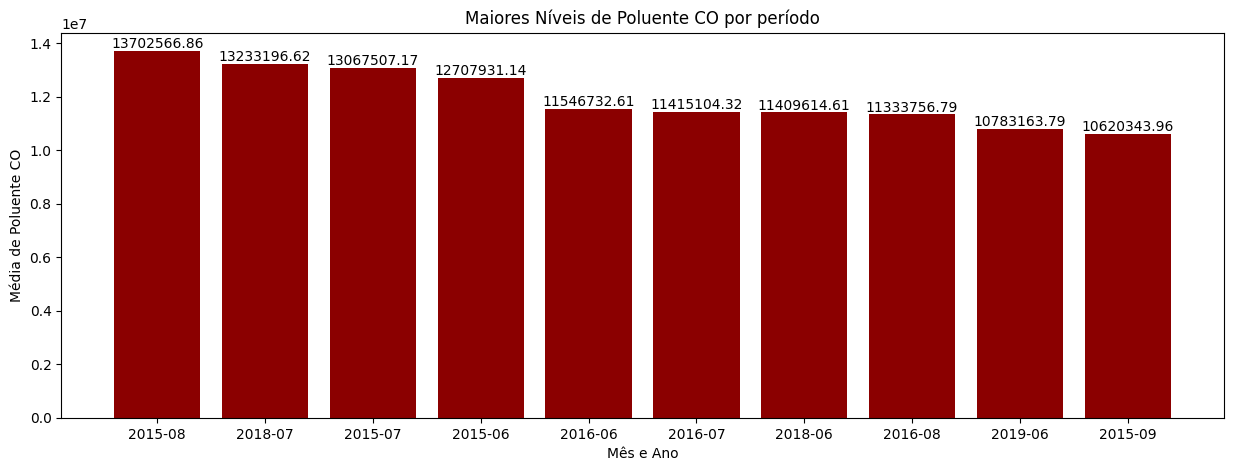

In [15]:
#Gráfico dos 10 Períodos com maior nível de concentração de CO
# Definir tamanho e largura das colunas e gráfico
fig, ax = plt.subplots(figsize=(15,5))


# Criar o gráfico de barras
plt.bar(maior_periodo_ano.index, maior_periodo_ano, color='darkred')

# Inserir titulo no gráfico
plt.title('Maiores Níveis de Poluente CO por período')

#Adicionar rótulos aos eixos
plt.xlabel('Mês e Ano')
plt.ylabel('Média de Poluente CO')

# Adicionar os percentuais nas barras
for i, valor in enumerate(maior_periodo_ano):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

# Exibir o gráfico
plt.show()

In [16]:
#10 Períodos com menor nível de concentração de CO
menor_periodo_ano = df_CO.groupby('ano_mes') ['Valor'].sum()
menor_periodo_ano = menor_periodo_ano.sort_values(ascending = True).head(10)
menor_periodo_ano

,Valor
ano_mes,
2021-11,2.907550e+06
2021-12,3.213851e+06
2021-10,3.981912e+06
2020-03,4.011107e+06
2021-04,4.098942e+06
2020-04,4.429073e+06
2021-09,4.735624e+06
2021-01,4.750970e+06
2021-02,4.758207e+06


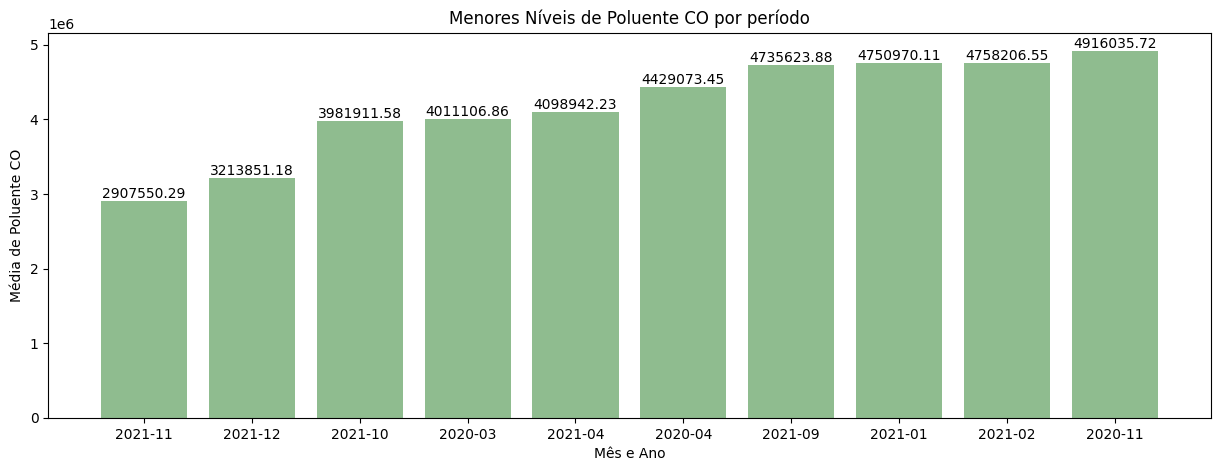

In [17]:
#Gráfico dos 10 Períodos com menor nível de concentração de CO

# Definir tamanho das colunas e gráfico
fig, ax = plt.subplots(figsize=(15,5))


# Criar o gráfico de barras
plt.bar(menor_periodo_ano.index, menor_periodo_ano, color='darkseagreen')

# Inserir titulo no gráfico
plt.title('Menores Níveis de Poluente CO por período')

#Adicionar rótulos aos eixos
plt.xlabel('Mês e Ano')
plt.ylabel('Média de Poluente CO')

# Adicionar os percentuais nas barras
for i, valor in enumerate(menor_periodo_ano):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

# Exibir o gráfico
plt.show()

In [18]:
#Horário de maior concentração de CO
periodo_hr = df_CO.groupby('Hora') ['Valor'].sum()
periodo_hr

,Valor
Hora,
01:00,2.810395e+07
02:00,2.446402e+07
03:00,2.201673e+07
04:00,2.015809e+07
05:00,7.124646e+06
06:00,2.302123e+07
07:00,2.954138e+07
08:00,3.454188e+07
09:00,3.299029e+07


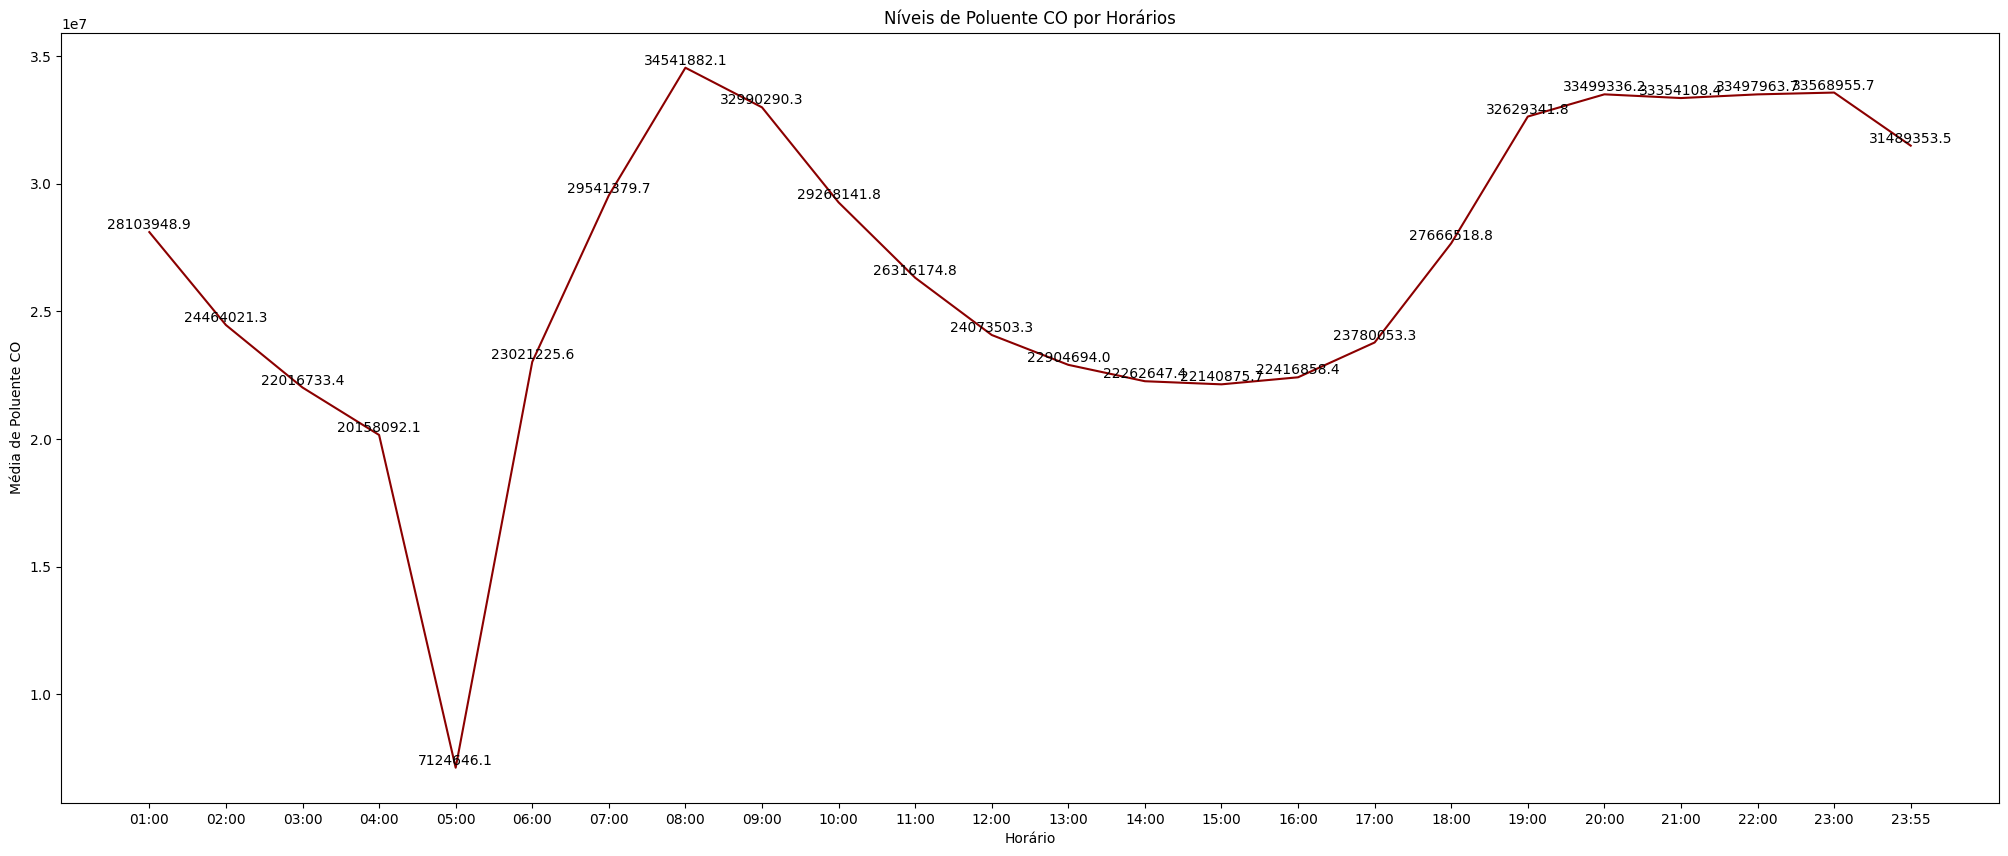

In [19]:
# Definir tamanho e largura das colunas e gráfico
fig, ax = plt.subplots(figsize=(25,10))


# Criar o gráfico de barras
plt.plot(periodo_hr.index, periodo_hr, color='darkred')

# Inserir titulo no gráfico
plt.title('Níveis de Poluente CO por Horários')

#Adicionar rótulos aos eixos
plt.xlabel('Horário')
plt.ylabel('Média de Poluente CO')

# Adicionar os percentuais nas barras
for i, valor in enumerate(periodo_hr):
    plt.text(i, valor, f'{valor:.1f}', ha='center', va='bottom')

# Exibir o gráfico
plt.show()


In [20]:
# nível de concentração de CO por mês e ano
df_CO['mes_ano'] = df_CO['Data'].str.slice(0,7)
concentracao_ano = df_CO.groupby('mes_ano') ['Valor'].sum() #Validar se deixara soma ou média
concentracao_ano

<ipython-input-20-ec9ef84a8a3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CO['mes_ano'] = df_CO['Data'].str.slice(0,7)


,Valor
mes_ano,
2015-01,8.713668e+06
2015-02,8.415477e+06
2015-03,9.953219e+06
2015-04,7.645669e+06
2015-05,9.505059e+06
...,...
2021-08,7.100691e+06
2021-09,4.735624e+06
2021-10,3.981912e+06


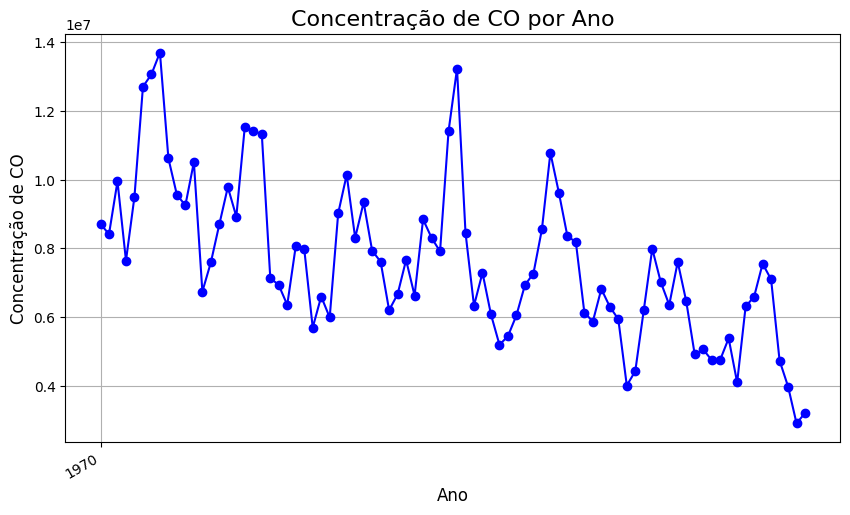

In [21]:
# Gera o gráfico de linha
plt.figure(figsize=(10,6))  # Ajusta o tamanho da figura
plt.plot(concentracao_ano.index, concentracao_ano.values, marker='o', linestyle='-', color='b')

# Adiciona título e rótulos aos eixos
plt.title('Concentração de CO por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Concentração de CO', fontsize=12)

# Ajustando os ticks do eixo x para exibir apenas ano
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Gera grade no gráfico
plt.grid(True)

# Ajusta o espaçamento dos rótulos do eixo x para não sobrepor
plt.gcf().autofmt_xdate()

# Exibe o gráfico
plt.show()

In [22]:
concentracao_ano.head(10)

,Valor
mes_ano,
2015-01,8.713668e+06
2015-02,8.415477e+06
2015-03,9.953219e+06
2015-04,7.645669e+06
2015-05,9.505059e+06
2015-06,1.270793e+07
2015-07,1.306751e+07
2015-08,1.370257e+07
2015-09,1.062034e+07


In [23]:
#Transformando a variável concentrao_ano (Series) em uma tabela (DataFrame)

concentracao_ano = concentracao_ano.reset_index()
type(concentracao_ano)


pandas.core.frame.DataFrame

In [24]:
concentracao_ano.dtypes

,0
mes_ano,object
Valor,float64


In [25]:
concentracao_ano["Valor"] = concentracao_ano['Valor'].round(2)

In [26]:
concentracao_ano["mes_ano"] = pd.to_datetime(concentracao_ano["mes_ano"])
concentracao_ano.dtypes

,0
mes_ano,datetime64[ns]
Valor,float64


In [27]:
# Tornando a váriavel 'ano' índice

concentracao_ano.set_index('mes_ano', inplace=True)
concentracao_ano

,Valor
mes_ano,
2015-01-01,8713667.71
2015-02-01,8415476.62
2015-03-01,9953219.38
2015-04-01,7645669.49
2015-05-01,9505059.38
...,...
2021-08-01,7100690.96
2021-09-01,4735623.88
2021-10-01,3981911.58


In [28]:
!pip install statsmodels

# Testando outra forma de fazer

In [29]:
from statsmodels.tsa.stattools import adfuller
def teste_estacionaria(timeseries):

    # Determinando estatísticas móveis
    rolmean = timeseries.rolling(12).mean() # média móvel
    rolstd = timeseries.rolling(12).std() # desvio médio

    # Plot de estatísticas móveis
    orig = plt.plot(timeseries, color='blue', label="Original")
    mean = plt.plot(rolmean, color="red", label="Média móvel")
    std = plt.plot(rolstd, color="black", label="Désvio médio")
    plt.legend(loc="best")
    plt.title("Média móvel e Desvio Padrão")
    plt.show(block=False)


    # Perform Dickey-Fuller test:
    print("Resultados do teste de Dickey-Fuller")
    dftest = adfuller(timeseries, autolag="AIC")

    # Organizando resultados
    dfoutput = pd.Series(dftest[0:4], index=["Estatística do teste", "p-value", "O critério de informação maximizado", "Número de observações usadas"])
    for key, value in dftest[4].items():
        dfoutput[f"Valor crítico ({key})"]= value

    print(dfoutput)

In [30]:
def estacionaria(concentracao_ano):
    dftest = adfuller(concentracao_ano, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Estatítica do teste", "p-value", "O critério de informação maximizado", "Número de observações usadas"])
    for key, value in dftest[4].items():
         dfoutput["Valor crítico (%s)"%key] = value

    if(dfoutput["Estatítica do teste"] < dfoutput["Valor crítico (5%)"] and dfoutput["p-value"] < 0.05):
        print("É estacionária")
    else:
        print("Não é estacionária")

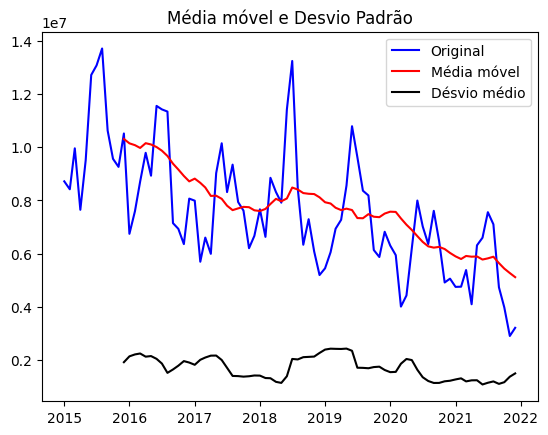

Resultados do teste de Dickey-Fuller
Estatística do teste                   -0.787324
p-value                                 0.822817
O critério de informação maximizado    11.000000
Número de observações usadas           72.000000
Valor crítico (1%)                     -3.524624
Valor crítico (5%)                     -2.902607
Valor crítico (10%)                    -2.588679
dtype: float64


In [31]:
teste_estacionaria(concentracao_ano)

In [32]:
estacionaria(concentracao_ano)

Não é estacionária


# Aplicando modelo SARIMA para Concentrção de CO2

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

In [34]:
# Ajuste do modelo SARIMA
modelo_sarima = SARIMAX(concentracao_ano['Valor'], order=(2,1,2), seasonal_order=(0,1,1,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
# Treinando o modelo
resultado = modelo_sarima.fit()

In [36]:
# Prevendo os poluentes para os próximos 12 meses (ano inteiro de 2022)
previsoes_2022 = resultado.forecast(steps=12)
print(previsoes_2022)

2022-01-01    3.286624e+06
2022-02-01    2.966277e+06
2022-03-01    3.227142e+06
2022-04-01    2.843756e+06
2022-05-01    4.414884e+06
2022-06-01    5.925109e+06
2022-07-01    5.899474e+06
2022-08-01    5.007897e+06
2022-09-01    3.836090e+06
2022-10-01    3.049719e+06
2022-11-01    2.048929e+06
2022-12-01    2.404636e+06
Freq: MS, Name: predicted_mean, dtype: float64


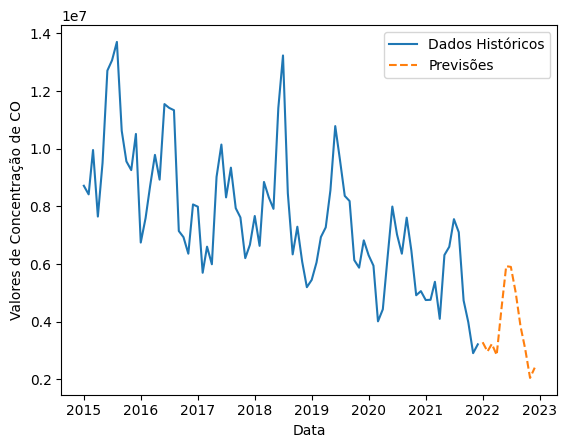

In [37]:
# Plotando os dados históricos as previsões
plt.plot(concentracao_ano.index, concentracao_ano['Valor'], label='Dados Históricos')
plt.plot(pd.date_range(start='2022-01-01', periods=12, freq='MS'), previsoes_2022, label='Previsões', linestyle='--')

# Adicionando título e legendas
plt.title=('Previsão SARIMA para poluentes ano 2022')
plt.xlabel('Data')
plt.ylabel('Valores de Concentração de CO')

plt.legend()  # Adiciona a legenda no gráfico

# Calculando e avaliando o desempenho do modelo SARIMA

In [38]:
# Modelo de avaliação Modelo de Rolling Forecast
valores_reais = concentracao_ano['Valor'][-12:]  # pegando os últimos 12 valores (2021)

In [39]:
# Calculando MSE e RMSE
mse = mean_squared_error(valores_reais, previsoes_2022)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 1466863.4068052692


## Validação cruzada com conjuntos de dados históricos

In [44]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score

# Número de splits para a validação cruzada
n_splits = 5

# Cria o objeto TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

# Itera sobre os splits
for train_index, test_index in tscv.split(concentracao_ano):
    # Separa os dados de treino e teste
    X_train, X_test = concentracao_ano.iloc[train_index], concentracao_ano.iloc[test_index]

    # Treina o modelo SARIMA com os dados de treino
    modelo_sarima = SARIMAX(X_train['Valor'], order=(2,1,2), seasonal_order=(0,1,1,12))


    # Faz previsões para os dados de teste
    previsoes = resultado.get_forecast(steps=len(X_test))
    previsoes_valores = previsoes.predicted_mean

    # Avalia o modelo
    mse = mean_squared_error(X_test['Valor'], previsoes_valores)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(X_test['Valor'], previsoes_valores)
    r2 = r2_score(X_test['Valor'], previsoes_valores)

    print(f"RMSE para este split: {rmse}")
    print(f"MAE para este split: {mae}")
    print(f"R² para este split: {r2}")

RMSE para este split: 5186324.931233487
MAE para este split: 4778331.352190271
R² para este split: -5.930462198167924
RMSE para este split: 5300634.813027534
MAE para este split: 4744484.0807617
R² para este split: -14.145748982100509
RMSE para este split: 5291862.434362724
MAE para este split: 4456452.00210354
R² para este split: -5.051376684919513
RMSE para este split: 3577706.981655348
MAE para este split: 3192081.6449296097
R² para este split: -8.99079285823444
RMSE para este split: 2089756.8960650489
MAE para este split: 1816654.2541196516
R² para este split: -1.460942499155787


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Testes com LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0256
Loss no conjunto de teste: 0.025579512119293213
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


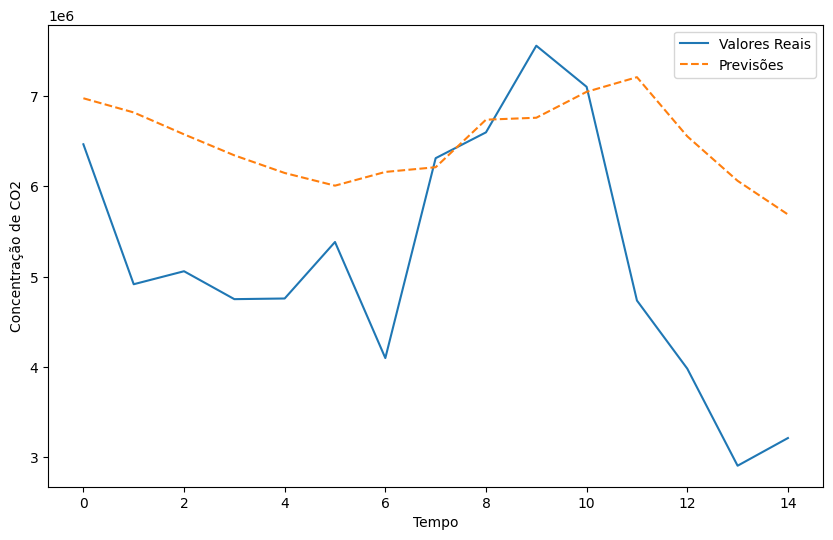

In [45]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Carregando os dados
data = concentracao_ano.copy()
data.index = pd.to_datetime(data.index)
values = data['Valor'].values.reshape(-1, 1)

# Normalizando os dados para o intervalo [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Criando as sequências para treinamento
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 12  # Número de meses para considerar no histórico
X, y = create_sequences(scaled_values, n_steps)

# Dividindo os dados em treino e teste (80%/20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construindo o modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# Avaliando o modelo
loss = model.evaluate(X_test, y_test)
print(f"Loss no conjunto de teste: {loss}")

# Fazendo previsões
y_pred = model.predict(X_test)

# Transformando de volta para os valores originais
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_inverse)), y_test_inverse, label='Valores Reais')
plt.plot(range(len(y_pred_inverse)), y_pred_inverse, label='Previsões', linestyle='--')
#plt.title('Previsão de Concentração de CO2 usando LSTM')
plt.xlabel('Tempo')
plt.ylabel('Concentração de CO2')
plt.legend()
plt.show()

RMSE: 0.15993596426885948
Mean Absolute Error (MAE): 0.13185982641568614
R-squared (R2): -0.681694038886822


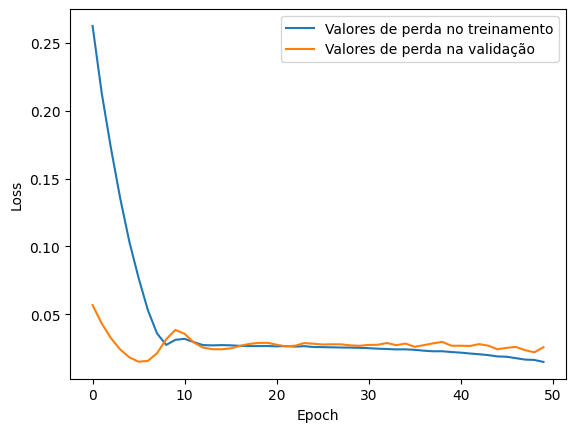

In [47]:
# Aavaliando o modelo LSTM
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Calculando outras metricas
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


# Plotando a validacao e treinamento
plt.plot(history.history['loss'], label='Valores de perda no treinamento')
plt.plot(history.history['val_loss'], label='Valores de perda na validação')
#plt.title('Valores de perda no treinamento e validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()